In [1]:
# Non linear feature relationship to label
# Interaction terms between features
# If feature X behaves like log x
# If we increase degree it becomes more linear to find accurate beta coefficients

In [2]:
# Effect of one feature with other i.e interaction term
# Bias=1(default),original,power and interaction
# x1=2 and x2=3
# 1,2,3,4,6,9

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('Advertising.csv')

In [5]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
X=df.drop('sales',axis=1)

In [7]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [8]:
y=df['sales']

In [9]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [10]:
from sklearn.preprocessing import PolynomialFeatures

In [11]:
polynomial_converter=PolynomialFeatures(degree=2,include_bias=False)
# it will create interaction terms also like X1*X2

In [12]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [13]:
poly_features=polynomial_converter.transform(X)

In [14]:
polynomial_converter.transform(X).shape

(200, 9)

In [15]:
X.shape

(200, 3)

In [16]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [17]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [18]:
polynomial_converter.fit_transform(X)

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [19]:
polynomial_converter.fit_transform(X).shape

(200, 9)

In [20]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
model=LinearRegression()

In [37]:
model.fit(X_train,y_train)

LinearRegression()

In [38]:
test_prediction=model.predict(X_test)

In [39]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [40]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [41]:
MAE=mean_absolute_error(y_test,test_prediction)

In [42]:
MSE=mean_squared_error(y_test,test_prediction)

In [43]:
RMSE=np.sqrt(MSE)

In [44]:
MAE

0.48967980448037

In [45]:
RMSE

0.6646431757269196

In [46]:
# Performing better than liner regression 
# We should consider polynomial features

In [47]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [49]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [50]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [51]:
# -3.04715806e-05
69.2**2

4788.64

### How to choose best model parameter or decide the deree of polynomial

In [53]:
# Bias-Variance Trade Off
# Overfitting or underfitting
# Hogher order polynomial model performs better than linear model
# Increase model complexity for better performance
# Generalise well for unseen data and account variance and pattern in the known data

In [54]:
# Underfits(high bias,low variance),[simple model]does not understand the underlying trend and does not fit
# overfits(high variance) too much noise-low error on training set but high on test set
# overfitting could mislead you as it gives high performance on test data

In [55]:
# Good model- model complexity more less error
# as we increase degree of polynomial the error goes down
# Bad model-vice versa

In [56]:
# Test model performance on test set train set
# Error vs model complexity(On train and test set)

In [57]:
# optimal polynomial degree

In [58]:
# Create different order polynomial
# Split train/test
# fit on train
# stor the rmse for both train and test
# plot the result error vs ploynomial degree

In [60]:
train_rmse_errors=[]
test_rmse_errors=[]
for d in range(1,10):
    poly_converter=PolynomialFeatures(degree=d,include_bias=False)
    poly_features=poly_converter.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    model=LinearRegression()
    model.fit(X_train,y_train)
    train_pred=model.predict(X_train)
    test_pred=model.predict(X_test)
    train_rmse=np.sqrt(mean_squared_error(y_train,train_pred))
    test_rmse=np.sqrt(mean_squared_error(y_test,test_pred))
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)

In [61]:
# some spike is there which is a  red flag as error increase on higher degree
train_rmse_errors

[1.734594124329376,
 0.5879574085292233,
 0.4339344356902067,
 0.35170836883993495,
 0.2509342951990972,
 0.1971254009841768,
 5.421422348088463,
 0.1426544837726474,
 0.16675345956185658]

In [62]:
# after some high degree it starts exploding
test_rmse_errors

[1.5161519375993873,
 0.6646431757269196,
 0.5803286825231453,
 0.5077742623872589,
 2.5758247707699113,
 4.492670773896812,
 1381.4040685804796,
 4449.568027403435,
 95893.02658330933]

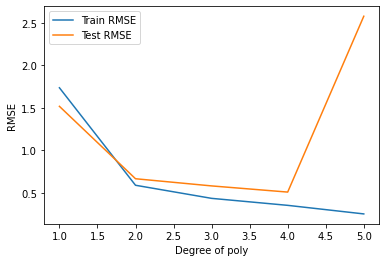

In [65]:
plt.plot(range(1,6),train_rmse_errors[:5],label='Train RMSE')
plt.plot(range(1,6),test_rmse_errors[:5],label='Test RMSE')
plt.ylabel('RMSE')
plt.xlabel('Degree of poly')
plt.legend()
# around 4th degree it shoots
# as it has 3 features so no need to go till 10

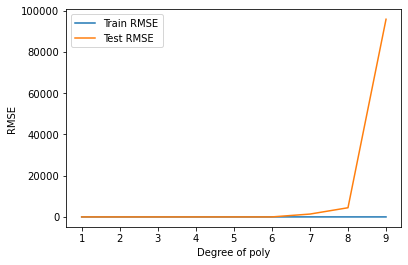

In [67]:
# Overfit of train data
plt.plot(range(1,10),train_rmse_errors,label='Train RMSE')
plt.plot(range(1,10),test_rmse_errors,label='Test RMSE')
plt.ylabel('RMSE')
plt.xlabel('Degree of poly')
plt.legend()

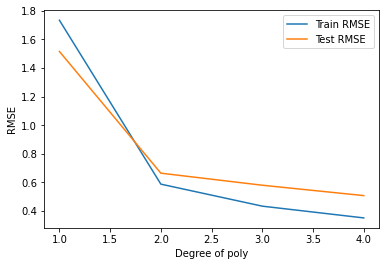

In [68]:
# Degree 4 is better than degree 3 as it has three features
# because the error for train and test both decreases
# but we will take degree 3 as there is arisk of overshooting
plt.plot(range(1,5),train_rmse_errors[:4],label='Train RMSE')
plt.plot(range(1,5),test_rmse_errors[:4],label='Test RMSE')
plt.ylabel('RMSE')
plt.xlabel('Degree of poly')
plt.legend()

In [69]:
final_poly_converter=PolynomialFeatures(degree=3,include_bias=False)

In [70]:
final_model=LinearRegression()

In [71]:
full_converted_X=final_poly_converter.fit_transform(X)
final_model.fit(full_converted_X,y)

LinearRegression()

In [72]:
from joblib import dump,load

In [73]:
dump(final_model,'final_poly_model.joblib')

['final_poly_model.joblib']

In [74]:
dump(final_poly_converter,'final_poly_converter.joblib')

['final_poly_converter.joblib']

In [75]:
loaded_converter=load('final_converter.joblib')

C:\Users\rajsh\anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator PolynomialFeatures from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [76]:
loaded_model=load('final_poly_model.joblib')

In [77]:
campaign=([[149,22,12]])

In [81]:
transformed_data=loaded_converter.fit_transform(campaign)

In [80]:
loaded_converter.fit_transform(campaign).shape

In [82]:
loaded_model.predict(transformed_data)

array([14.64501014])

In [83]:
# Is more accurate and gives more sales than linear regression

### Regularisation


In [84]:
# Reduce model overfitting
# all about adding penalty hyper parameters
# L1(LASSO) add a penalty equal to absolute magnitude of coefficients
# Limit size of coefficients
# L2(Ridge)-add penalty equal to square of magnitude of coeff to the error we are trying to minimize
# Lamba decide the strength of penalty
# Elastic net L1 and L2 if alpha is 0 the l1 is not used and if it is one l2 is not used as it gets cancelled


In [85]:
# Feature scaling
# KNN which depnds on distance is beniffited more
# Gradient descent in different scales,some features will update much faster then other
# To perform it optimally
# No need in decision tree,regression tree or random forest
# also have to scale the new values

In [86]:
# 1.Standardiszation-mean of 0 and std of 1 'Z-score normalization'
# 2.Normalization rescales values between 0-1(using min and max value)
# .fit() only on train set as it gives min and max or mean ,std for normalization
# otherwise if we call on full data it will leak some information from test data
# Do we need to scale label?No it's not advised

In [87]:
# Cross validation
# Train on all data and evaluate on data
# k for train and 1/k(10%)test
# do it individually and calculate k error and its mean for getting high performance
# k=to number of row

In [88]:
# hold out test set which won't be tuned
# and do k-fold cross validation train test split and tune it
# then do final evaluation on hold out final test
# Then generate a true final performance matrx

In [89]:
# Train,validation hold out test set

In [90]:
# Regularisation Data setup

In [92]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [117]:
X=df.drop('sales',axis=1)

In [119]:
y=df['sales']

In [120]:
polynomial_convert=PolynomialFeatures(degree=3,include_bias=False)

In [125]:
poly_featur=polynomial_converter.fit_transform(X)

In [126]:
poly_featur.shape

(200, 19)

In [127]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [128]:
X_train

array([[1.93200000e+02, 1.84000000e+01, 6.57000000e+01, ...,
        1.78892953e+15, 6.38764511e+15, 2.28080589e+16],
       [2.87600000e+02, 4.30000000e+01, 7.18000000e+01, ...,
        1.81889664e+16, 3.03713439e+16, 5.07130812e+16],
       [8.02000000e+01, 0.00000000e+00, 9.20000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 4.72161363e+08],
       ...,
       [2.39800000e+02, 4.10000000e+00, 3.69000000e+01, ...,
        1.56585764e+12, 1.40927188e+13, 1.26834469e+14],
       [2.14700000e+02, 2.40000000e+01, 4.00000000e+00, ...,
        9.43718400e+06, 1.57286400e+06, 2.62144000e+05],
       [1.63300000e+02, 3.16000000e+01, 5.29000000e+01, ...,
        1.15761426e+15, 1.93790489e+15, 3.24415091e+15]])

In [129]:
from sklearn.preprocessing import StandardScaler

In [131]:
scaler=StandardScaler()

In [132]:
scaler.fit(X_train)

StandardScaler()

In [133]:
X_train=scaler.transform(X_train)

In [134]:
X_test=scaler.transform(X_test)

In [138]:
X_train

array([[ 0.49300171, -0.33994238,  1.61586707, ..., -0.08048775,
        -0.00351656,  0.06313894],
       [ 1.61337153,  1.32852213,  1.90079242, ...,  1.05971619,
         0.65122552,  0.34632933],
       [-0.84811893, -1.58789957, -1.02319564, ..., -0.20486213,
        -0.17789584, -0.16832559],
       ...,
       [ 1.04606563, -1.30982215,  0.27064572, ..., -0.20475327,
        -0.17751111, -0.16703844],
       [ 0.74817069,  0.03987068, -1.26608283, ..., -0.20486213,
        -0.17789584, -0.1683256 ],
       [ 0.13813882,  0.55533126,  1.01799092, ..., -0.12437961,
        -0.12499207, -0.13540277]])

In [136]:
X_test

array([[-0.91339472,  1.76259419,  0.68168558, ..., -0.13422956,
        -0.15223855, -0.15950208],
       [ 1.23121149,  0.23655959, -1.19601922, ..., -0.20486213,
        -0.17789584, -0.1683256 ],
       [-0.46002473, -0.40776614,  0.35005115, ..., -0.20217464,
        -0.17555483, -0.16639504],
       ...,
       [-1.33115973,  1.19965698, -1.18200649, ..., -0.20486211,
        -0.17789583, -0.1683256 ],
       [ 1.3522684 , -0.23142436, -1.4389064 , ..., -0.20486213,
        -0.17789584, -0.1683256 ],
       [ 0.27818504, -0.06186496,  0.01841672, ..., -0.20377901,
        -0.17730042, -0.16801572]])

In [139]:
# Ridge regression
# Why to add penalty while minising error
# We are trying not to overfit the data
# Introduce bias to reduce variance and not overfit to data and help generalizing
# As if we try reduce to Beta coeff and beta square coeff lower slope and less steep
# not jumping more fast and we have more space to handle the data 
# We'll give range of lambda and then choose which gives best performance matrix
# lambda is alpha
# calculate negative rmse
# So higher the score the better it is

In [140]:
from sklearn.linear_model import Ridge

In [141]:
help(Ridge)

Help on class Ridge in module sklearn.linear_model._ridge:

class Ridge(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, _BaseRidge)
 |  Ridge(alpha=1.0, *, fit_intercept=True, normalize=False, copy_X=True, max_iter=None, tol=0.001, solver='auto', random_state=None)
 |  
 |  Linear least squares with l2 regularization.
 |  
 |  Minimizes the objective function::
 |  
 |  ||y - Xw||^2_2 + alpha * ||w||^2_2
 |  
 |  This model solves a regression model where the loss function is
 |  the linear least squares function and regularization is given by
 |  the l2-norm. Also known as Ridge Regression or Tikhonov regularization.
 |  This estimator has built-in support for multi-variate regression
 |  (i.e., when y is a 2d-array of shape (n_samples, n_targets)).
 |  
 |  Read more in the :ref:`User Guide <ridge_regression>`.
 |  
 |  Parameters
 |  ----------
 |  alpha : {float, ndarray of shape (n_targets,)}, default=1.0
 |      Regularization strength; must be a positive float. Regul

In [142]:
ridge_model=Ridge(alpha=10)

In [143]:
ridge_model.fit(X_train,y_train)

Ridge(alpha=10)

In [144]:
test_pred=ridge_model.predict(X_test)

In [145]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [146]:
MAE=mean_absolute_error(y_test,test_pred)

In [147]:
MAE

0.624991563578321

In [148]:
RMSE=np.sqrt(mean_squared_error(y_test,test_pred))

In [149]:
RMSE

0.9256089802403071

In [150]:
# Use cross validation to test alpha

In [151]:
from sklearn.linear_model import RidgeCV

In [157]:
# We have to provide score matrics
# Default leave one out validation
ridge_cv_model=RidgeCV(alphas=(0.1,1.0,10.0),scoring='neg_mean_absolute_error')

In [158]:
ridge_cv_model.fit(X_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), scoring='neg_mean_absolute_error')

In [166]:
ridge_cv_model.alpha_

1.0

In [160]:
# from sklearn.metrics import SCORERS

In [156]:
# SCORERS.keys()
# 'neg_mean_absolute_error','neg_mean_squared_error'

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [167]:
test_pred=ridge_cv_model.predict(X_test)

In [168]:
MAE=mean_absolute_error(y_test,test_pred)

In [169]:
RMSE=np.sqrt(mean_squared_error(y_test,test_pred))

In [170]:
MAE

0.5953100575021051

In [171]:
RMSE

0.9242857053350071

In [172]:
ridge_cv_model.coef_

array([ 3.24417964e+00,  7.81879078e-01,  1.58464053e-01, -5.68885604e-01,
        2.43388762e+00,  2.73918332e-01, -3.50221690e-01,  3.29459798e-01,
       -1.98987907e-01, -8.12622390e-01,  9.64428148e-02, -4.99385074e-01,
        1.34998229e+00,  2.24908940e-01, -1.47548474e-03, -5.65396163e-01,
        9.18740228e-02, -1.05326902e-01,  1.47965270e-02, -4.63297286e-01,
       -7.55448380e-02, -2.88164957e-01, -1.75702068e-01, -2.03681122e-01,
       -1.44358267e-01,  8.44291267e-01,  5.49883507e-02, -7.07981008e-02,
        7.52868185e-03, -4.64299449e-01,  6.74526515e-02, -1.01328688e-01,
       -1.78625428e-02,  1.33560100e-01, -1.41250018e-01,  7.10640261e-02,
       -2.28200492e-02, -1.75551171e-01, -6.26382150e-02,  5.61460304e-03,
       -2.88558217e-01, -1.82683441e-01, -9.17746432e-02, -1.51904659e-02,
        5.79875088e-01,  1.27741212e-02, -9.29480606e-02, -4.02004267e-02,
       -2.69218483e-03, -2.82847940e-01,  8.39699315e-02, -4.16070203e-02,
       -1.69699268e-02,  

In [173]:
# LASSo REgression
# It can yield some coeff equal to zero when lambda is large
# can also perform variable selection

In [176]:
from sklearn.linear_model import LassoCV

In [200]:
# We can provide list or set none which provide itself or min max limit of alphas
# cv is number of fold
# eps=min/max
# lasso_cv_model=LassoCV(eps=0.1,n_alphas=100,cv=5)
lasso_cv_model=LassoCV(eps=0.0001,n_alphas=100,cv=5,max_iter=100000000)

In [201]:
lasso_cv_model.fit(X_train,y_train)

LassoCV(cv=5, eps=0.0001, max_iter=100000000)

In [202]:
lasso_cv_model.alpha_


0.006094048853269989

In [203]:
test_preds=lasso_cv_model.predict(X_test)

In [204]:
RMSE=np.sqrt(mean_squared_error(y_test,test_preds))

In [205]:
MAE=mean_absolute_error(y_test,test_preds)

In [206]:
MAE

0.42824613172290454

In [207]:
RMSE

0.6107871978806246

In [208]:
# lass is performing less than ridge

In [198]:
# Benifit of lasso
lasso_cv_model.coef_

array([ 4.28098740e+00,  2.46664345e-02,  1.86045869e-01, -3.06184973e+00,
        4.78398775e+00, -0.00000000e+00, -0.00000000e+00,  1.54432997e-01,
        0.00000000e+00, -0.00000000e+00, -9.38705002e-01, -3.68511025e-01,
        0.00000000e+00, -7.90934028e-02, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -5.89393497e-02,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  

In [209]:
# only looking at two feature for its performance matrix
# For eps=0.1 and max_iter was default
# More complex model as it search for more alpha but still it's having zero for many features
# Better than ridge as it was considering alll the feature and same performance

In [210]:
# Elastic net(L1+L2)

In [211]:
from sklearn.linear_model import ElasticNetCV

In [212]:
# l1_ration is alpha and n_alphas is lambda from equation
elastic_model=ElasticNetCV(l1_ratio=[.1,.5,.7,.9,.95,1],eps=0.001,n_alphas=100,max_iter=100000)

In [213]:
elastic_model.fit(X_train,y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], max_iter=100000)

In [214]:
elastic_model.l1_ratio_

1.0

In [215]:
# It chooses l1 completely duplicated lassocv model
elastic_model.alpha_

0.006094048853269989

In [216]:
lasso_cv_model.alpha_

0.006094048853269989

In [217]:
test_predss=elastic_model.predict(X_test)

In [218]:
MAE=mean_absolute_error(y_test,test_predss)

In [219]:
RMSE=np.sqrt(mean_squared_error(y_test,test_preds))

In [220]:
MAE

0.42824613172290454

In [221]:
RMSE

0.6107871978806246

In [222]:
# Elastic net can decide itself if it wants completely L1 or L2 model